In [1]:
#You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

#1. Pregnancies: Number of times pregnant (integer)

#2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

#3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

#4. SkinThickness: Triceps skin fold thickness (mm) (integer)

#5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

#6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

#7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

#8. Age: Age in years (integer)

#9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

#Here’s the dataset link : https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

#Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

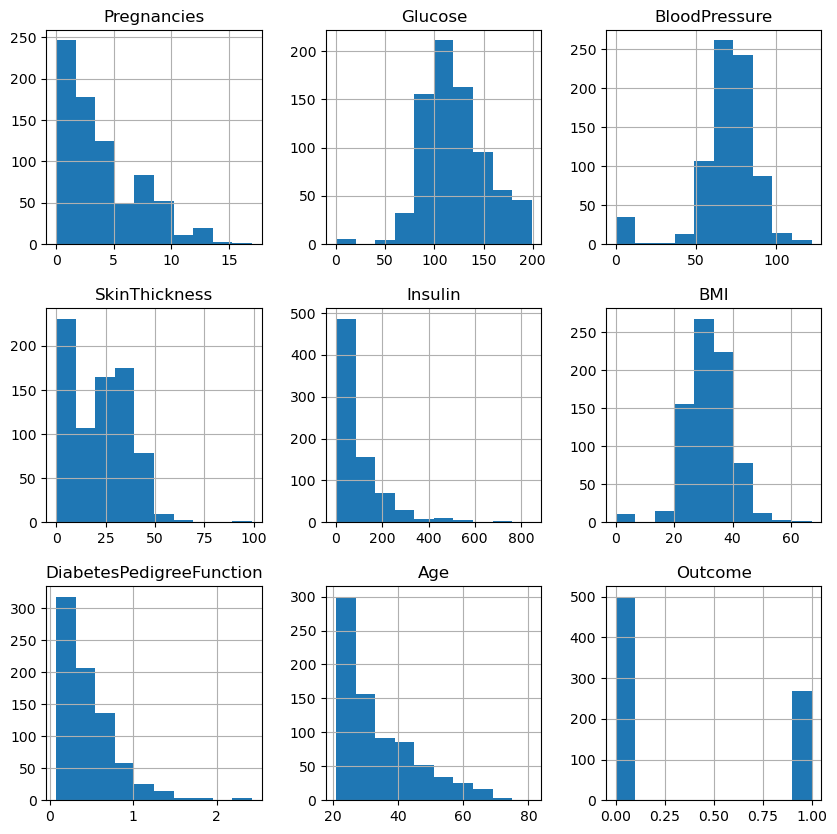

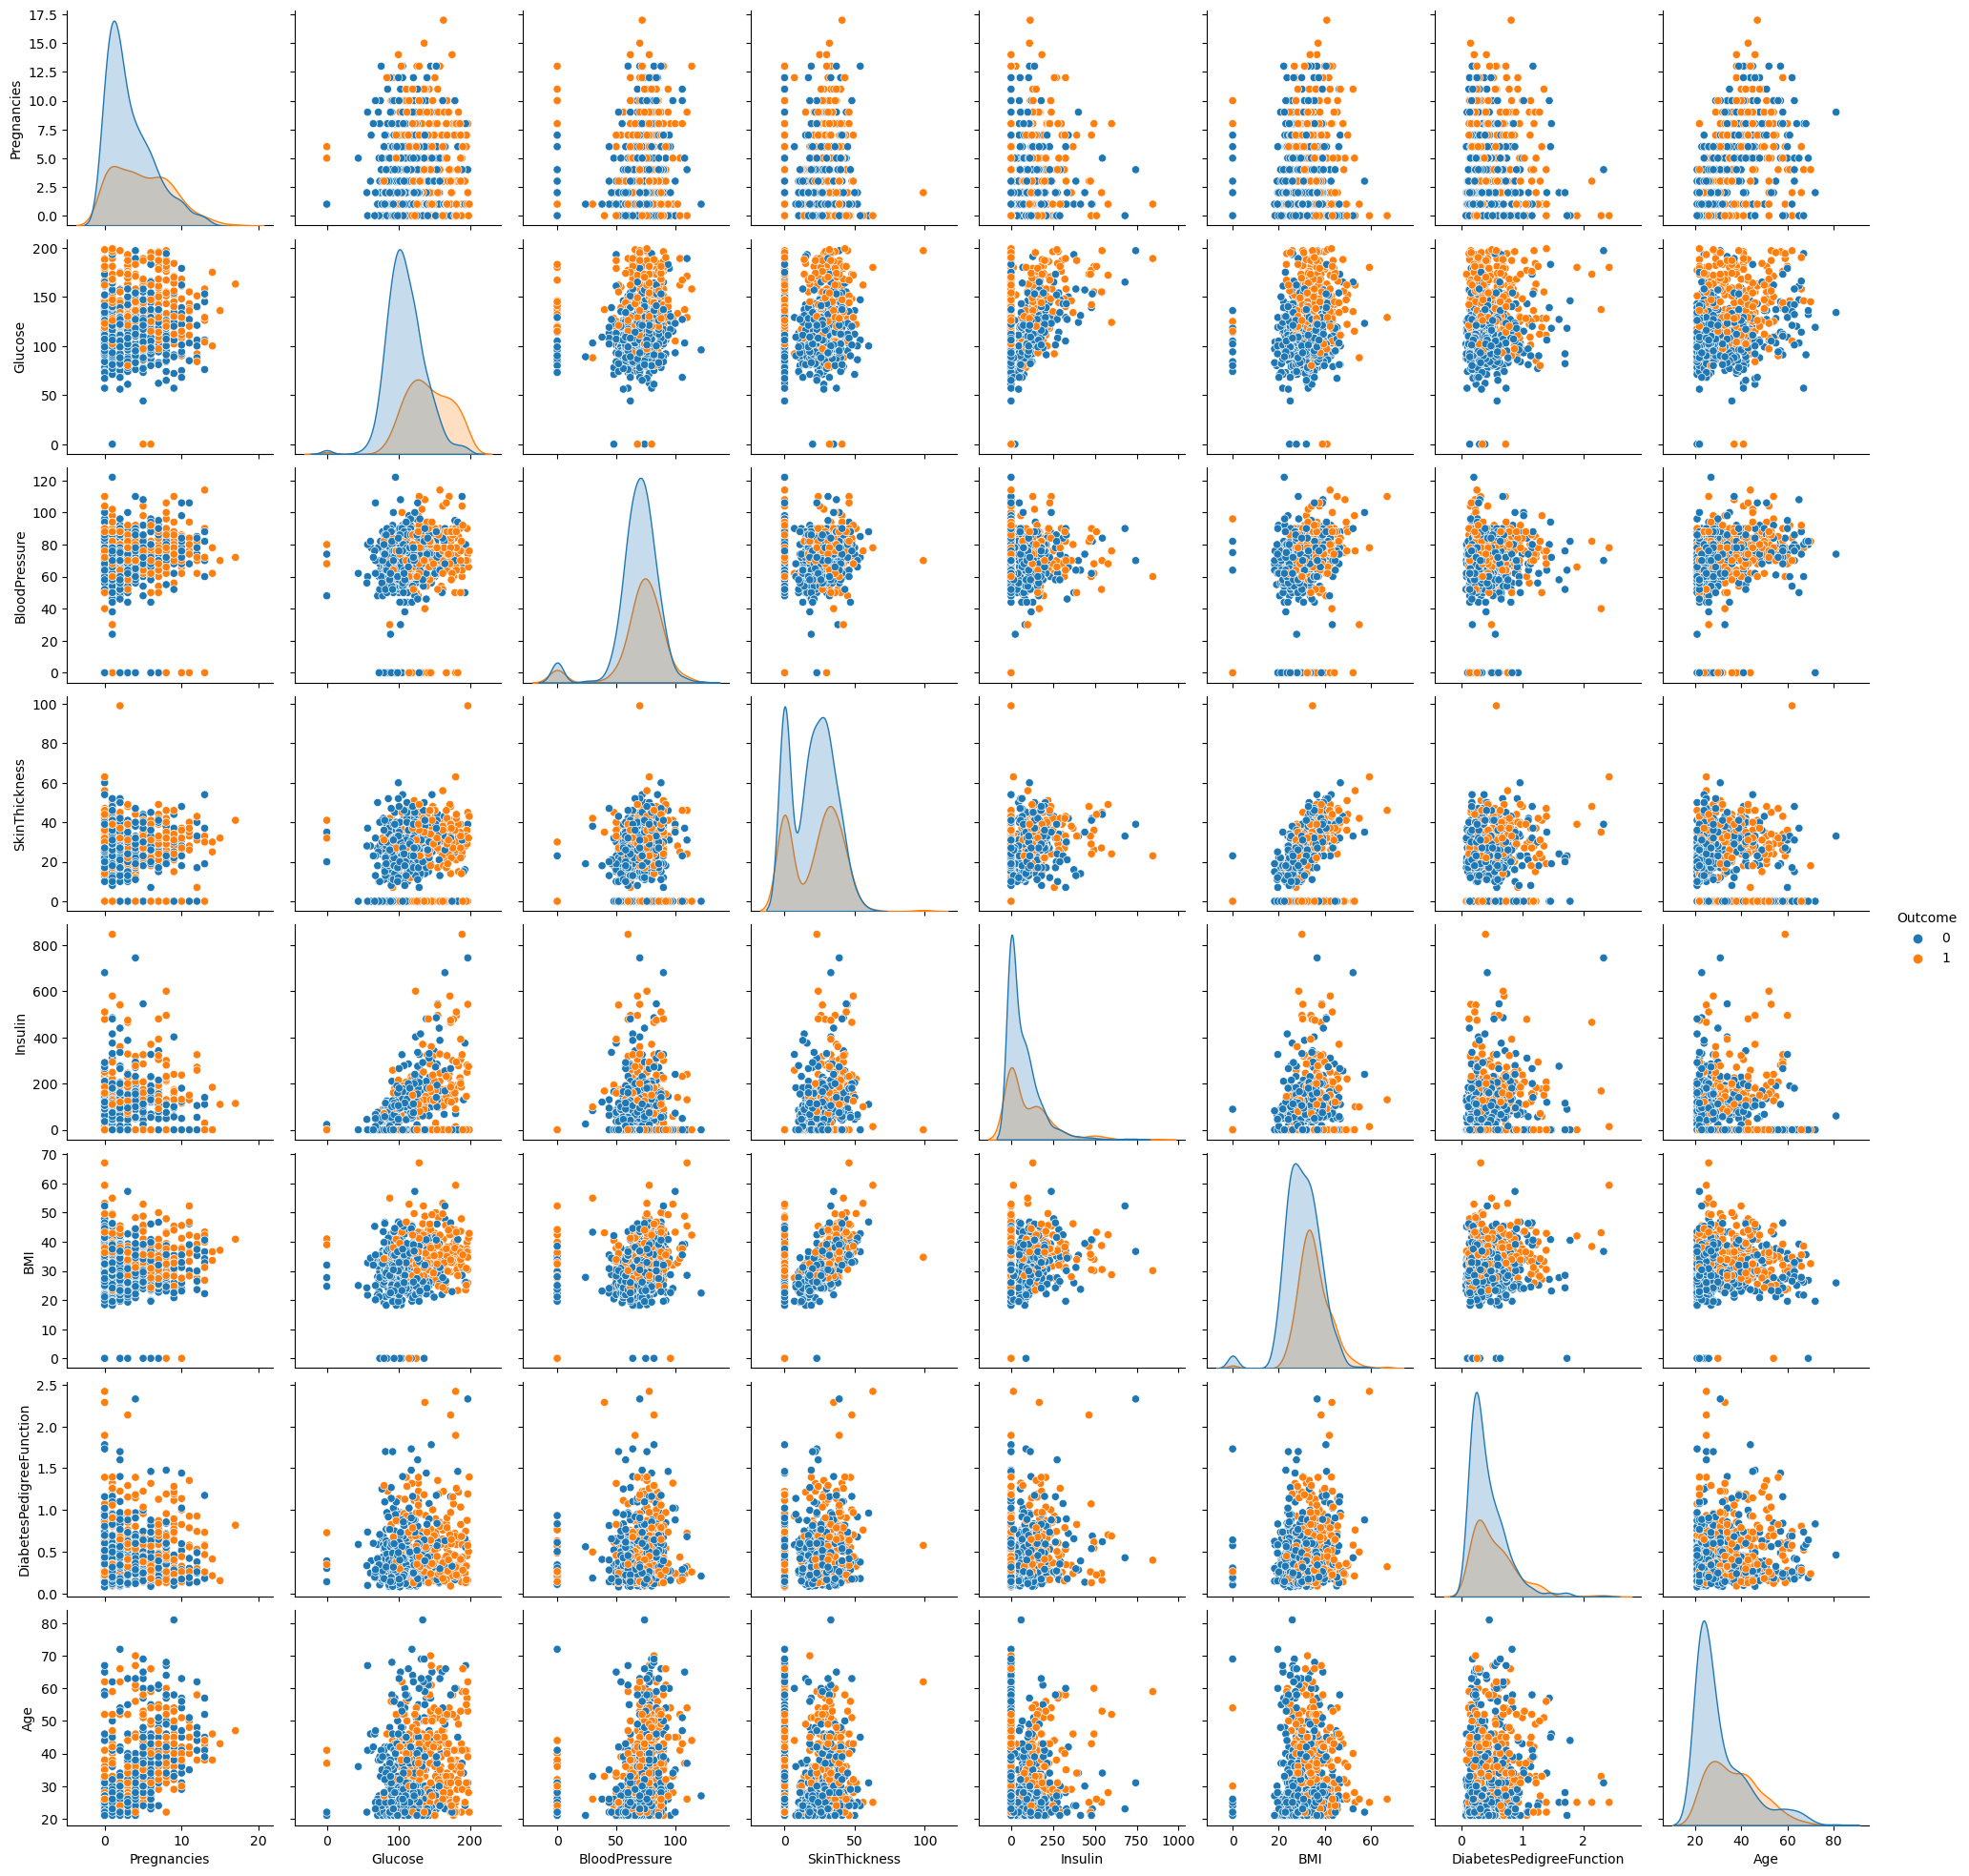

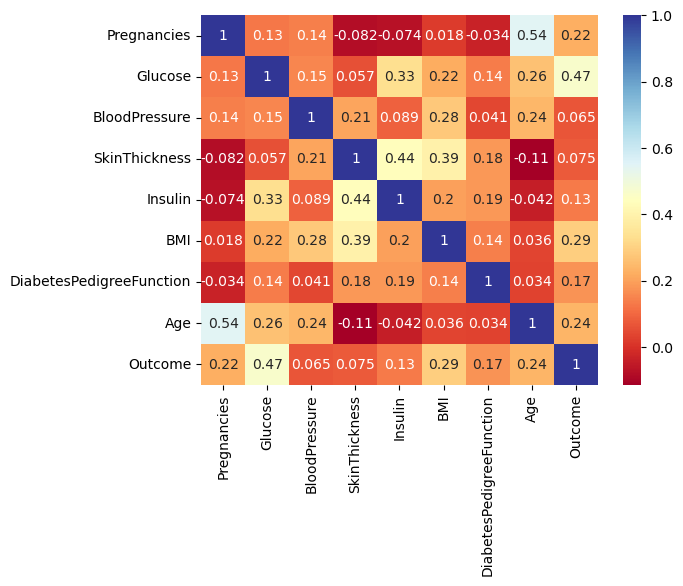

In [5]:
#1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

#Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download the dataset
# Dataset: diabetes.csv

# Step 2: Import the necessary libraries

# Step 3: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 4: Examine the variables

# Display the first few rows of the dataset
print(data.head())

# Get an overview of the dataset
print(data.info())

# Compute descriptive statistics of the dataset
print(data.describe())

# Step 5: Visualize the variables

# Histogram of each variable
data.hist(figsize=(10, 10))
plt.show()

# Pair plot to visualize relationships between variables
sns.pairplot(data, hue='Outcome')
plt.show()

# Correlation matrix heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


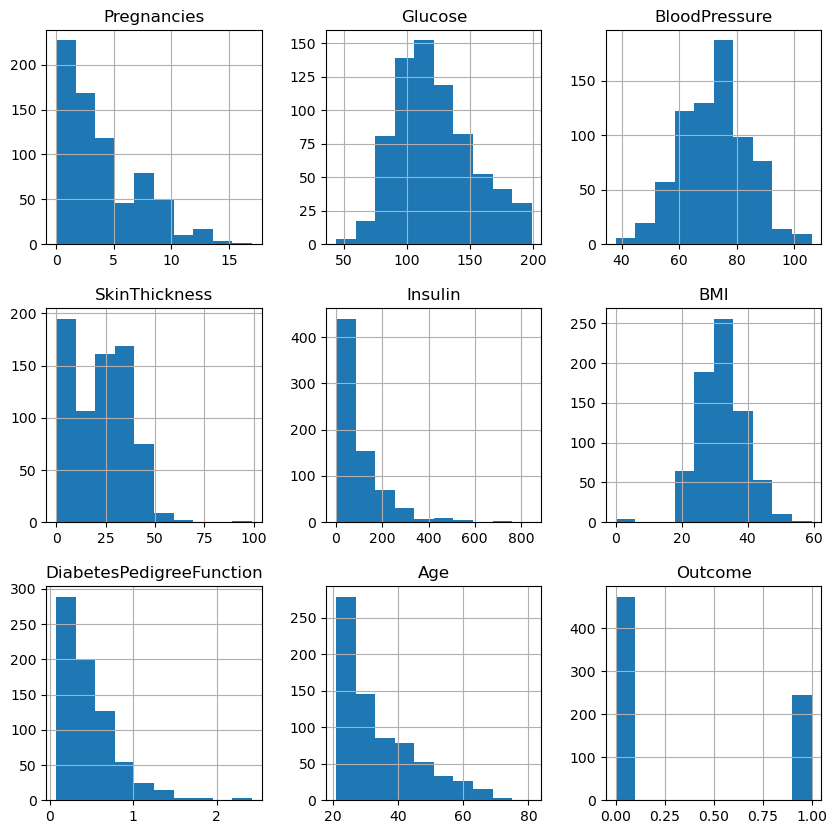

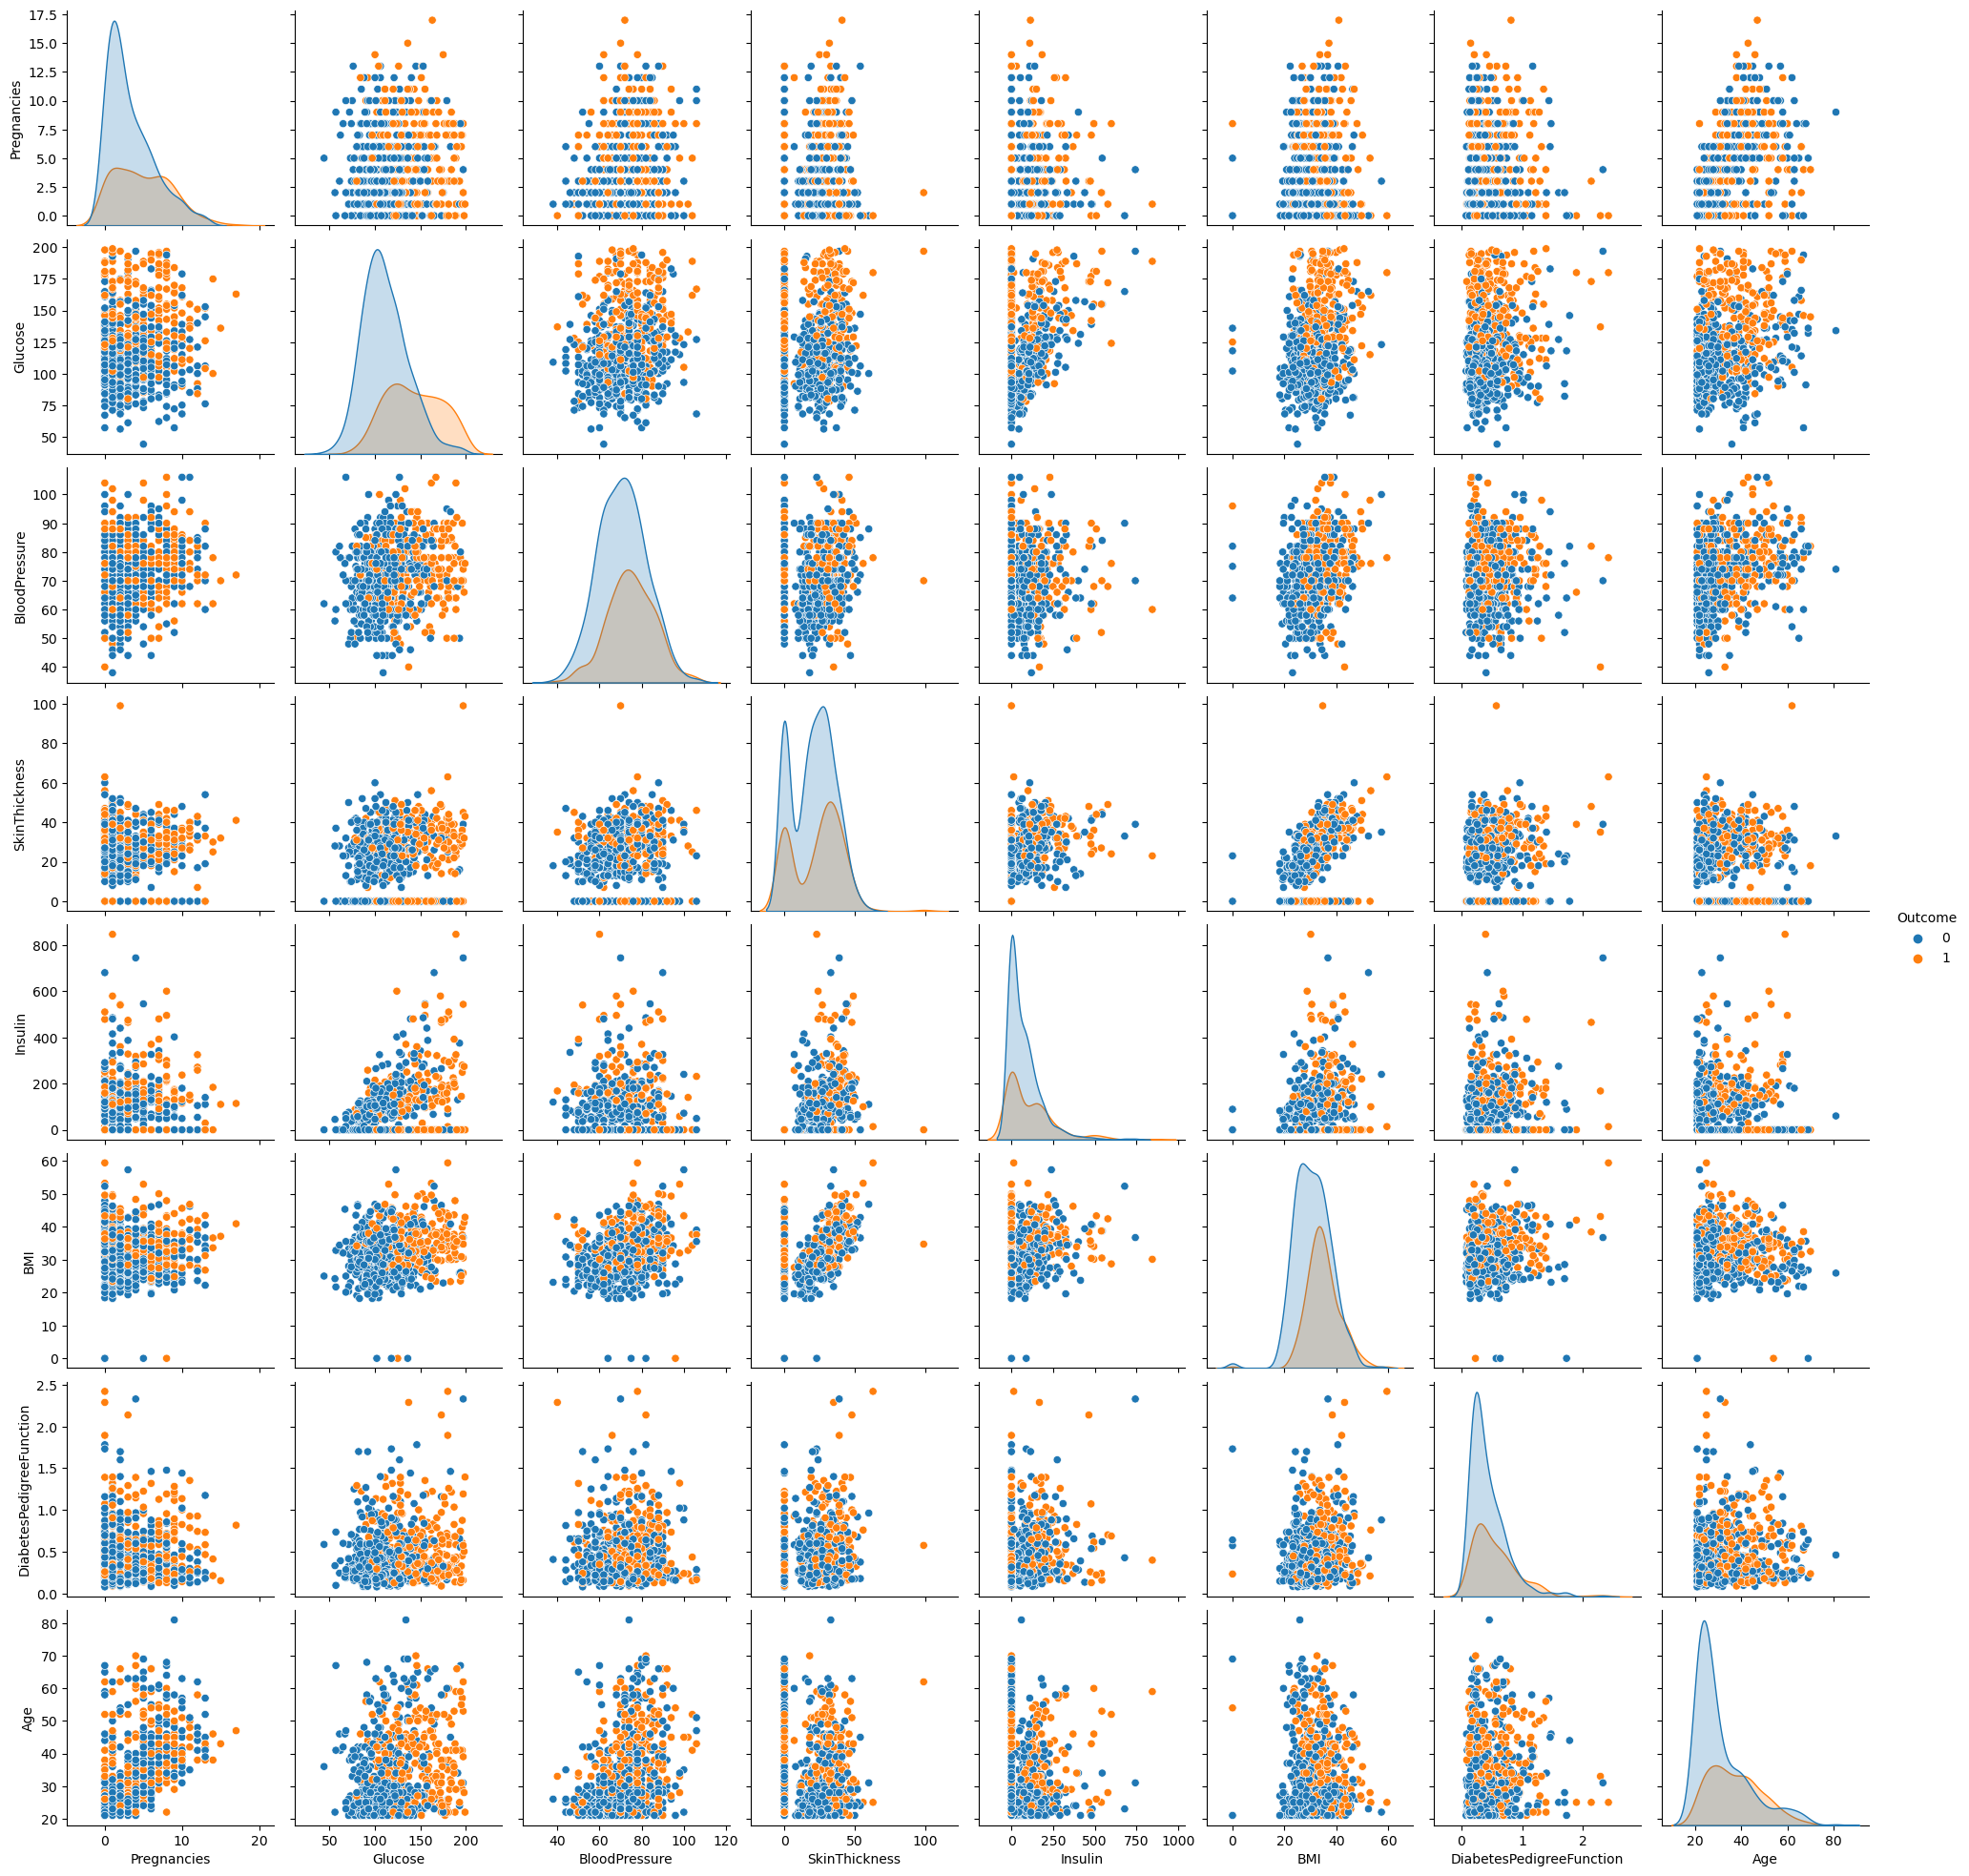

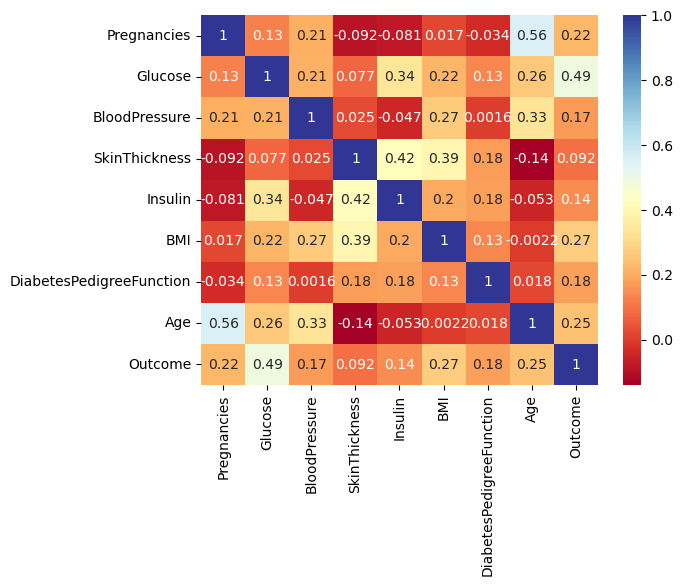

In [6]:
#2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

#Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Handle outliers
# Assuming 'Glucose' and 'BloodPressure' columns have outliers
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Glucose'] >= Q1 - 1.5 * IQR) & (data['Glucose'] <= Q3 + 1.5 * IQR)]

Q1 = data['BloodPressure'].quantile(0.25)
Q3 = data['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['BloodPressure'] >= Q1 - 1.5 * IQR) & (data['BloodPressure'] <= Q3 + 1.5 * IQR)]

# Step 3: Transform categorical variables
data = pd.get_dummies(data)

# Step 4: Examine the preprocessed data
print(data.head())

# Step 5: Visualize the preprocessed data
data.hist(figsize=(10, 10))
plt.show()

sns.pairplot(data, hue='Outcome')
plt.show()

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.show()

In [7]:
#3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Step 3: Split the dataset into training set and test set
# Set the random seed for reproducibility
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Step 4: Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [8]:
#4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

#Ans

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Step 3: Split the dataset into training set and test set
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Step 4: Create an instance of the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Step 5: Define the hyperparameters to tune using cross-validation
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 6: Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, params, cv=5)
grid_search.fit(X_train, y_train)

# Step 7: Get the best hyperparameters and the corresponding best model
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

# Step 8: Fit the best model on the training set
best_dt_model.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Step 10: Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857


Confusion Matrix:
[[76 23]
 [16 39]]


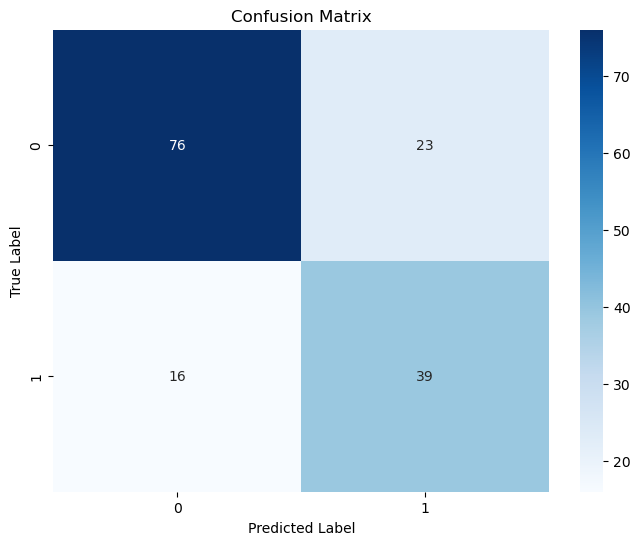

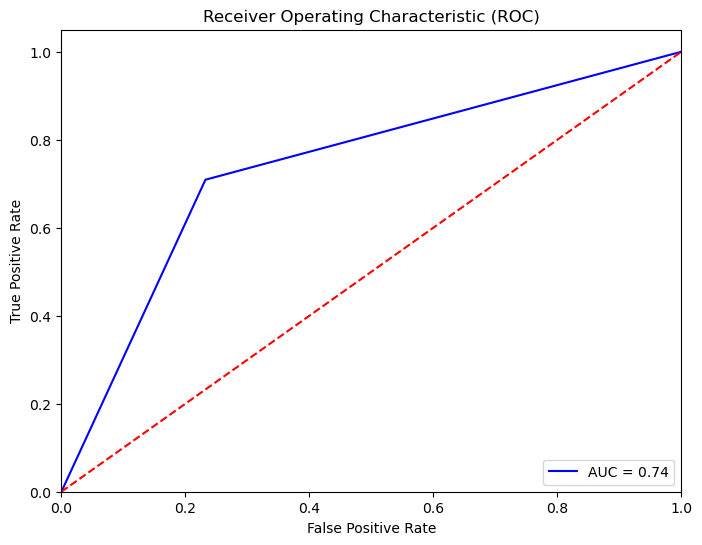

Accuracy: 0.7467532467532467
Precision: 0.6290322580645161
Recall: 0.7090909090909091
F1 Score: 0.6666666666666666


In [9]:
#5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

#Ans

import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Step 3: Split the dataset into training set and test set
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Step 4: Create an instance of the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Step 5: Fit the decision tree classifier on the training set
dt_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Step 7: Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 8: Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 9: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 10: Calculate the false positive rate, true positive rate, and area under the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Step 12: Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [10]:
#6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

#Ans

#Interpreting the decision tree and examining the splits, branches, and leaves can provide insights into the patterns and trends identified by the model. By analyzing the tree structure, we can identify the most important variables and their thresholds for making predictions. However, without the actual decision tree structure generated by the model, I can't provide specific information about the splits and thresholds in your case. Nonetheless, I can offer some general guidance on interpreting decision trees for binary classification tasks like predicting diabetes.

#1 - Root Node: The first split in the decision tree occurs at the root node. This split is based on the variable that the model considers most important for predicting the outcome. The root node provides an initial separation of the data based on a specific threshold of that variable.

#2 - Splits and Branches: As we move down the tree, subsequent splits and branches occur based on other variables and their corresponding thresholds. Each split further divides the data into more specific subgroups based on different criteria.

#3 - Leaves: The terminal nodes of the decision tree are called leaves. Each leaf represents a final prediction or outcome. For binary classification, the leaves will correspond to either the non-diabetic class (0) or the diabetic class (1).

#4 - Importance of Variables: The decision tree model determines the importance of variables based on their ability to split the data and improve the predictive accuracy. Variables that appear higher up in the tree and are involved in multiple splits are generally considered more important in making predictions.

#5 - Thresholds: The decision tree identifies optimal thresholds for each variable to split the data. These thresholds determine the conditions under which a sample is assigned to one branch or the other. For example, in the case of glucose level, the threshold could be a specific value above which a patient is more likely to be classified as diabetic.

#By examining the splits, branches, and leaves of the decision tree and considering domain knowledge and common sense, you can gain insights into how the model is making predictions and identify important variables and their corresponding thresholds. This can help understand the patterns and trends that the model has learned from the data and provide valuable insights for decision-making in the context of diabetes prediction.

In [11]:
#7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

#Ans

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Step 3: Split the dataset into training set and test set
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Step 4: Create an instance of the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Step 5: Fit the decision tree classifier on the training set
dt_classifier.fit(X_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

# Step 7: Perform scenario testing
# Drop samples with missing values
X_scenario = X.copy()
X_scenario.dropna(inplace=True)
y_scenario = y[X_scenario.index]
y_pred_scenario = dt_classifier.predict(X_scenario)
accuracy_scenario = accuracy_score(y_scenario, y_pred_scenario)
print("Accuracy with Scenario Testing:", accuracy_scenario)

Accuracy on Test Set: 0.7272727272727273
Accuracy with Scenario Testing: 0.9453125
